<a href="https://colab.research.google.com/github/nguyenhanphinam/BTAI2/blob/main/fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/BtAI2/phan_loai_trai_cay'

/content/drive/MyDrive/BtAI2/phan_loai_trai_cay


In [ ]:
trainset='/content/drive/MyDrive/BtAI2/phan_loai_trai_cay/training_test'
validationset='/content/drive/MyDrive/BtAI2/phan_loai_trai_cay/validation'
train=ImageDataGenerator(rescale=1/255.0)
validation=ImageDataGenerator(rescale=1/255.0,validation_split=0.99)

In [ ]:
training_data=train.flow_from_directory(trainset,target_size=(150,150),batch_size=10,class_mode='categorical',subset="training",shuffle=True,)

Found 473 images belonging to 10 classes.


In [ ]:
validation_set=validation.flow_from_directory(validationset,target_size=(150,150),batch_size=10,class_mode='categorical',shuffle=True,subset="validation",)

Found 90 images belonging to 10 classes.


In [ ]:
training_data.class_indices
{'bo': 0, 'chuoi': 1, 'dudu': 2, 'dua': 3, 'mit': 4, 'nhan': 5, 'oi': 6, 'saurieng': 7, 'thanhlong': 8, 'xoai': 9 }

{'bo': 0,
 'chuoi': 1,
 'dua': 3,
 'dudu': 2,
 'mit': 4,
 'nhan': 5,
 'oi': 6,
 'saurieng': 7,
 'thanhlong': 8,
 'xoai': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(training_data,batch_size=5,epochs=100,verbose=1,validation_data=validation_set)

Epoch 1/100
48/48 [==============================] - 131s 2s/step - loss: 2.2463 - accuracy: 0.1818 - val_loss: 2.3360 - val_accuracy: 0.1000
Epoch 2/100
48/48 [==============================] - 2s 40ms/step - loss: 2.1941 - accuracy: 0.1818 - val_loss: 2.3773 - val_accuracy: 0.1000
Epoch 3/100
48/48 [==============================] - 2s 40ms/step - loss: 2.1803 - accuracy: 0.1712 - val_loss: 2.4035 - val_accuracy: 0.1000
Epoch 4/100
48/48 [==============================] - 2s 39ms/step - loss: 2.1771 - accuracy: 0.1839 - val_loss: 2.4218 - val_accuracy: 0.1000
Epoch 5/100
48/48 [==============================] - 2s 40ms/step - loss: 2.1770 - accuracy: 0.1839 - val_loss: 2.4199 - val_accuracy: 0.1000
Epoch 6/100
48/48 [==============================] - 2s 42ms/step - loss: 2.1763 - accuracy: 0.1776 - val_loss: 2.4241 - val_accuracy: 0.1000
Epoch 7/100
48/48 [==============================] - 2s 39ms/step - loss: 2.1763 - accuracy: 0.1860 - val_loss: 2.4341 - val_accuracy: 0.1000
Epoch 

<function matplotlib.pyplot.show>

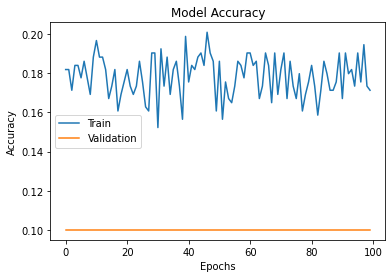

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save('/content/drive/MyDrive/BtAI2/phan_loai_trai_cay.h5')

In [ ]:
load_model('/content/drive/MyDrive/BtAI2/phan_loai_trai_cay.h5')

Found 10 images belonging to 10 classes.


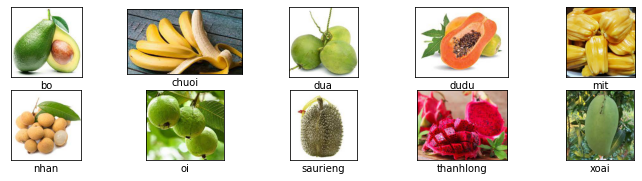

In [ ]:
generator= ImageDataGenerator(rescale=1./255)
generator_data=generator.flow_from_directory('/content/drive/MyDrive/BtAI2/phan_loai_trai_cay/test_traicay/',batch_size=5,shuffle=False,interpolation='lanczos')

trai_cay={0:'bo',
      1:'chuoi',
      2:'dua',
      3:'dudu',
      4:'mit',
      5:'nhan',
      6:'oi',
      7:'saurieng',
      8:'thanhlong',
      9:'xoai'}
plt.figure(figsize=(15,12))
for i in range(len(generator_data.filenames)):
    plt.subplot(8,5,i+1)
    plt.imshow(io.imread(os.path.join(generator_data.directory,generator_data.filenames[i])))
    plt.xticks([])
    plt.yticks([])
    img=load_img('/content/drive/MyDrive/BtAI2/phan_loai_trai_cay/test_traicay/'+generator_data.filenames[i],target_size=(150,150))
    img=img_to_array(img)
    img=img.reshape(1,150,150,3)
    img=img.astype('float')
    img=img/255
    plt.xlabel(trai_cay[i])
plt.show()